**Task-2:Prediction using Unsupervised ML**

*GRIP : The Sparks Foundation (GRIP-July 2021)*



**Author -Ishan Ayus**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd drive/MyDrive/GRIP/

/content/drive/MyDrive/GRIP


# **Data Load**

In [4]:
df=pd.read_csv("Iris.csv")
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
df.drop("Id", axis=1, inplace=True)
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# Exploring the Data

In [6]:
print(df.shape)
df.info()

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Visualization of input data

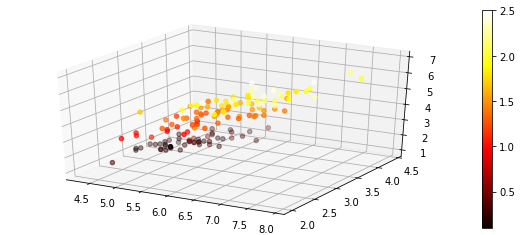

In [8]:
fig = plt.figure(1,figsize=(10,4))
ax = fig.add_subplot(111, projection='3d')


x=np.array(df['SepalLengthCm'])
y=np.array(df['SepalWidthCm'])
z = np.array(df['PetalLengthCm'])
c = np.array(df['PetalWidthCm'])

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()

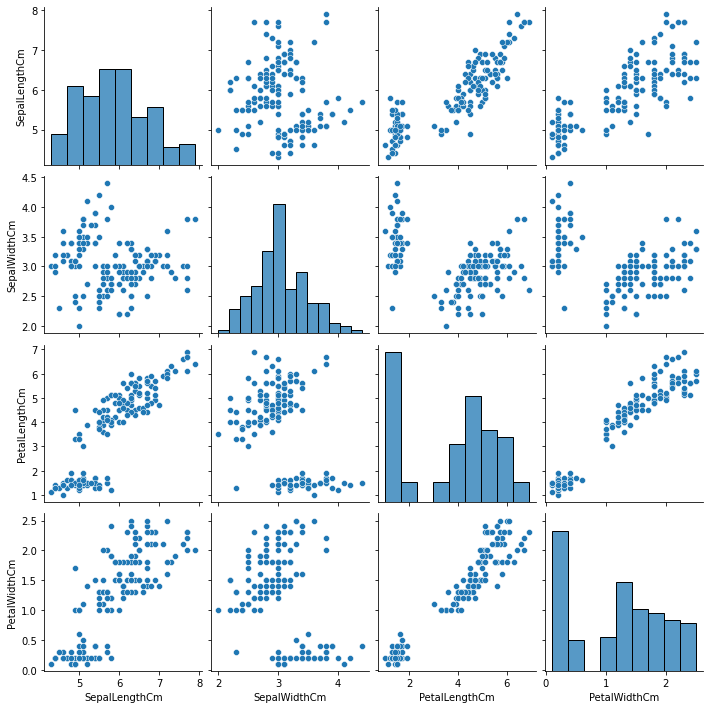

In [9]:
#pairwise relationship for the given dataset
import seaborn as sns
sns.pairplot(df)

# Outlier Detection and Removal


[] [2.  4.4 4.1 4.2] [] []


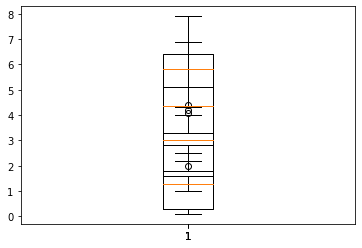

In [10]:
outliers1= plt.boxplot(df['SepalLengthCm'])["fliers"][0].get_data()[1]
outliers2= plt.boxplot(df['SepalWidthCm'])["fliers"][0].get_data()[1]
outliers3= plt.boxplot(df['PetalLengthCm'])["fliers"][0].get_data()[1]
outliers4= plt.boxplot(df['PetalWidthCm'])["fliers"][0].get_data()[1]
print(outliers1,outliers2,outliers3,outliers4)
i=df[(df['SepalWidthCm']==4.4)].index
df=df.drop(i)
i=df[(df['SepalWidthCm']==4.2)].index
df=df.drop(i)
i=df[(df['SepalWidthCm']==4.1)].index
df=df.drop(i)
i=df[(df['SepalWidthCm']==2.)].index
df=df.drop(i)



In [11]:
x = df.iloc[:, [0, 1, 2, 3]].values
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(df['Species'])

# **Elbow Method** 


In [12]:
# Finding the optimum number of clusters for k-means classification

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# **Elbow Curve**

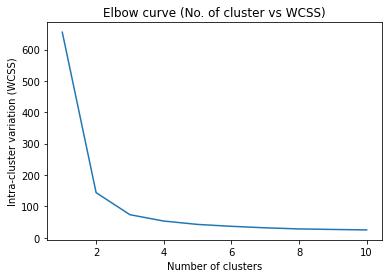

In [13]:
# Plotting the resulting curve 
plt.plot(range(1, 11), wcss)
plt.title('Elbow curve (No. of cluster vs WCSS)')
plt.xlabel('Number of clusters')
plt.ylabel('Intra-cluster variation (WCSS)') # Within cluster sum of squares
plt.show()

From the above graph we can consider that optimal number of cluster is 3

# Model Training 

In [14]:
# Applying kmeans to the dataset 
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x)

# Visualising the clusters

**1. Sepal length and sepal width**

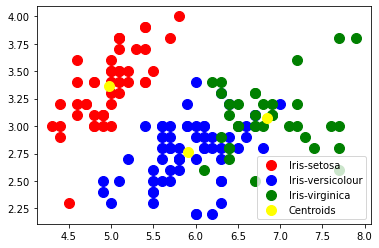

In [15]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],  s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

**2. petal length and petal width**

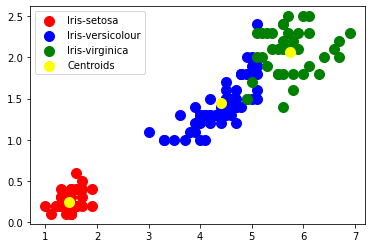

In [16]:
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

**Accuracy**

In [17]:
import sklearn.metrics as sm
sm.accuracy_score(y_kmeans,y, normalize=True)

0.8904109589041096

**Confusion Matrix**

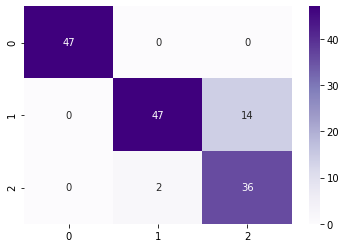

In [18]:
con=sm.confusion_matrix(y_kmeans,y)
sns.heatmap(con,annot=True,cmap='Purples')